# Baseball Case Study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

In [1]:
import pandas as pd
Baseball=pd.read_csv("baseball.csv",sep=",") #reading baseball.csv file
Baseball.head() #Looking into top 5 rows

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [2]:
Baseball.shape #Checking the shape of our data

(30, 17)

# Identifing the type of Problem

-- Output: Number of predicted wins (W)

In [3]:
Baseball.dtypes #Checking the datatype of each attribute

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

As per problem statement Target variable i.e. W is int64 i.e. continuous value so we'll use Regression to learn our model.

# Exploratory Data Analysis

## Handling Null Values

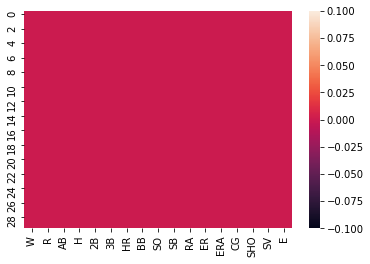

In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.heatmap(Baseball.isnull()) #Looking for null values if any, in heatmap

Here we can see in graph that there is no null values in dataset.

In [5]:
Baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Few columns have very low values in it, where few have very high values. Hence Scaling will be required to train our model.

## Univariate Analysis

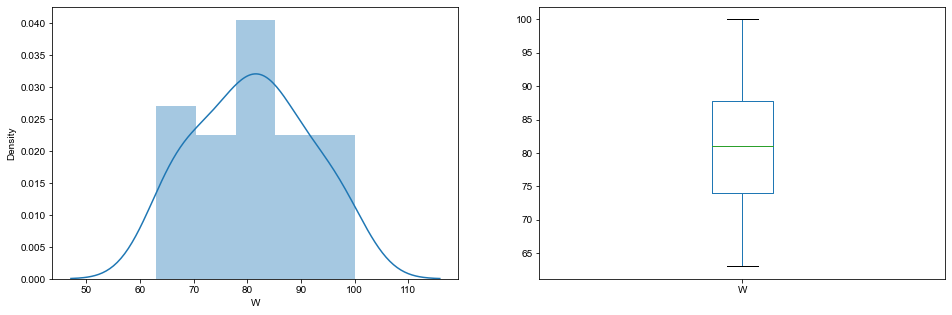

<Figure size 1152x360 with 0 Axes>

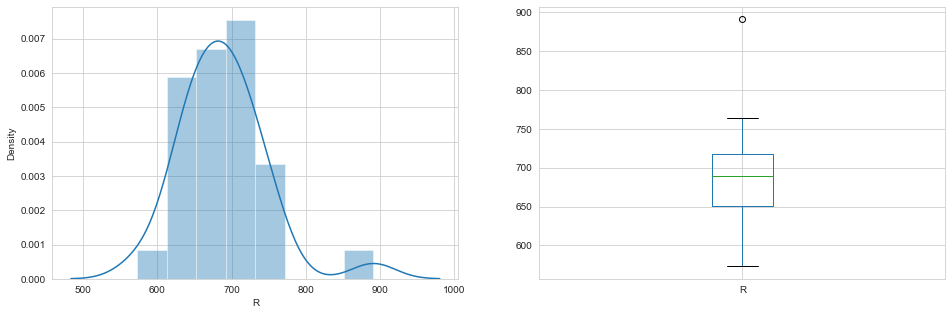

<Figure size 1152x360 with 0 Axes>

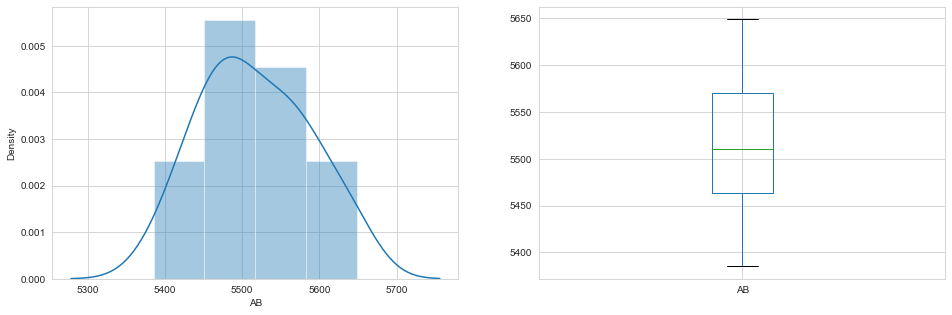

<Figure size 1152x360 with 0 Axes>

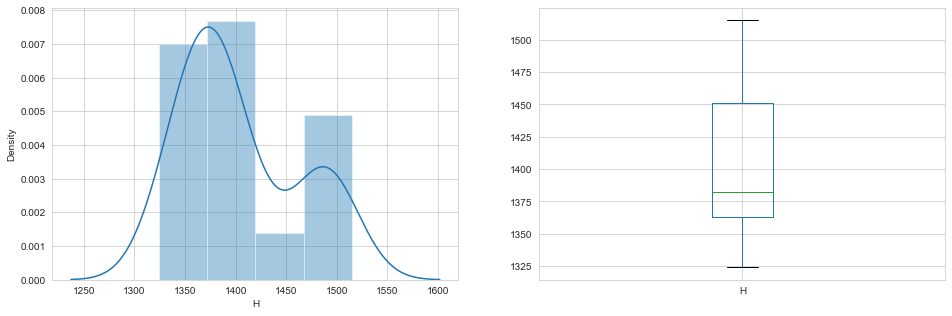

<Figure size 1152x360 with 0 Axes>

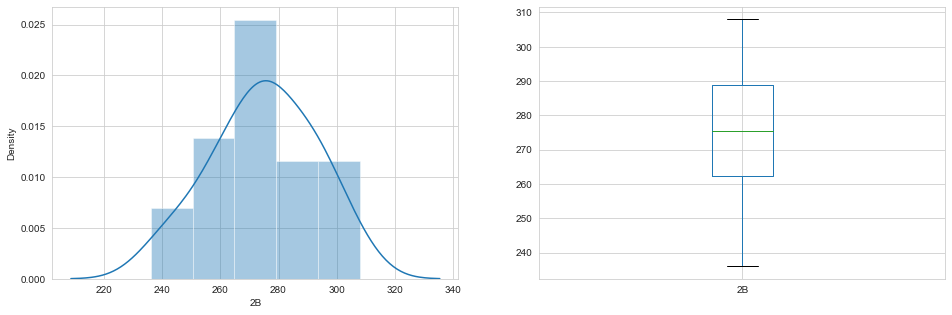

<Figure size 1152x360 with 0 Axes>

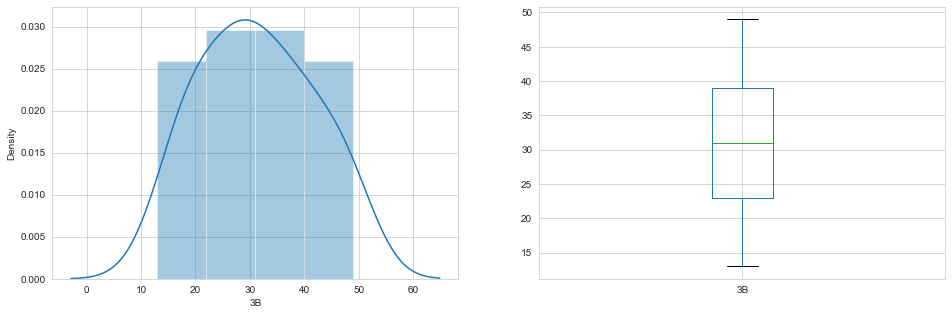

<Figure size 1152x360 with 0 Axes>

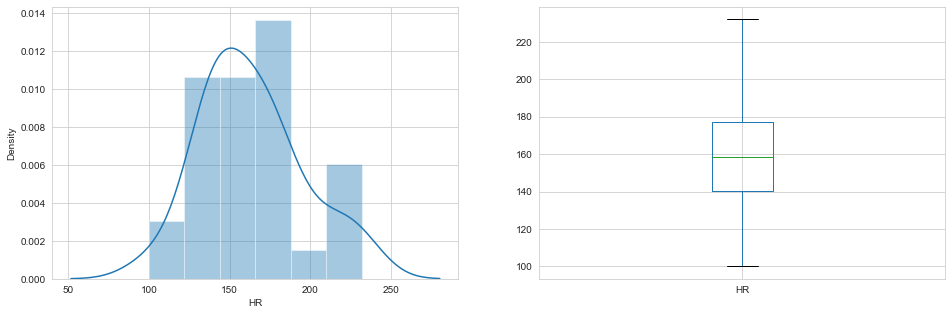

<Figure size 1152x360 with 0 Axes>

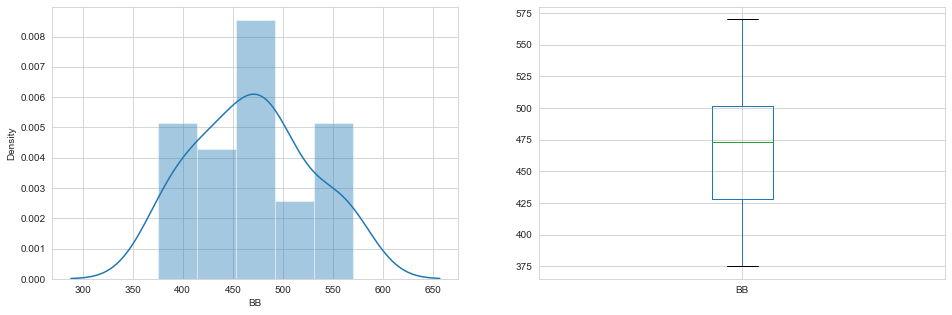

<Figure size 1152x360 with 0 Axes>

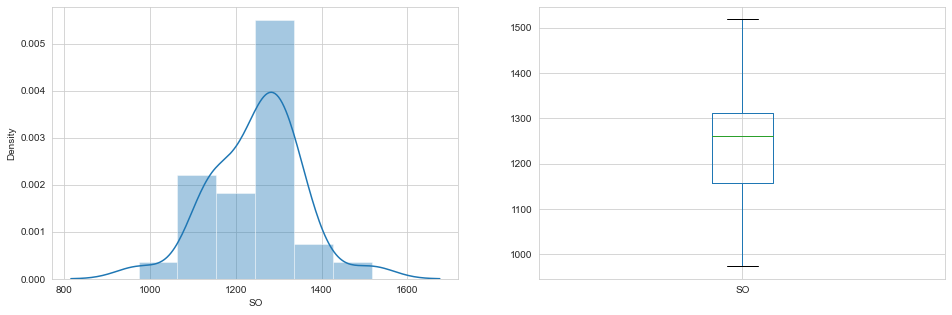

<Figure size 1152x360 with 0 Axes>

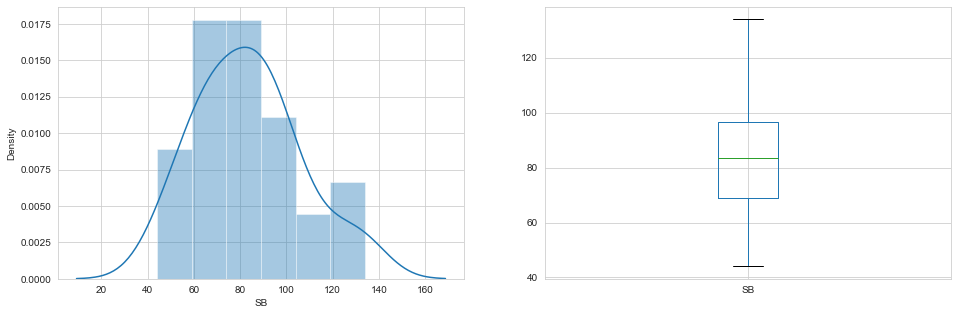

<Figure size 1152x360 with 0 Axes>

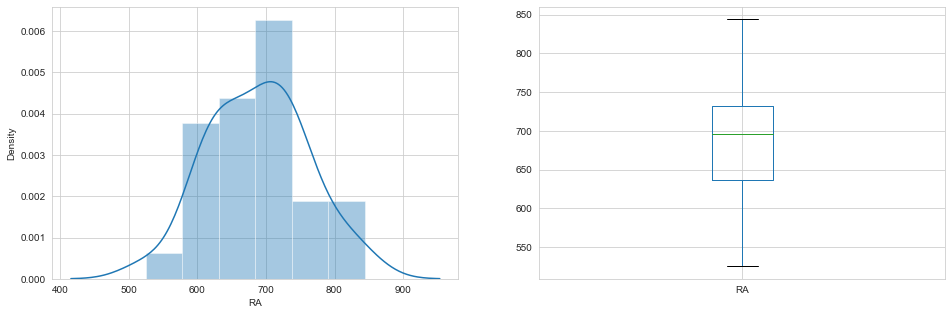

<Figure size 1152x360 with 0 Axes>

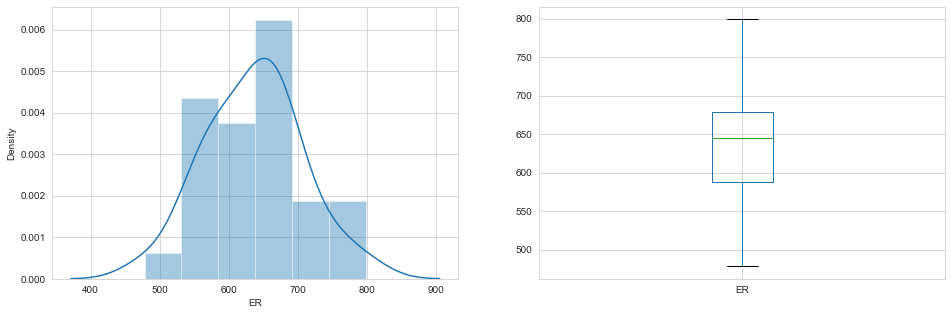

<Figure size 1152x360 with 0 Axes>

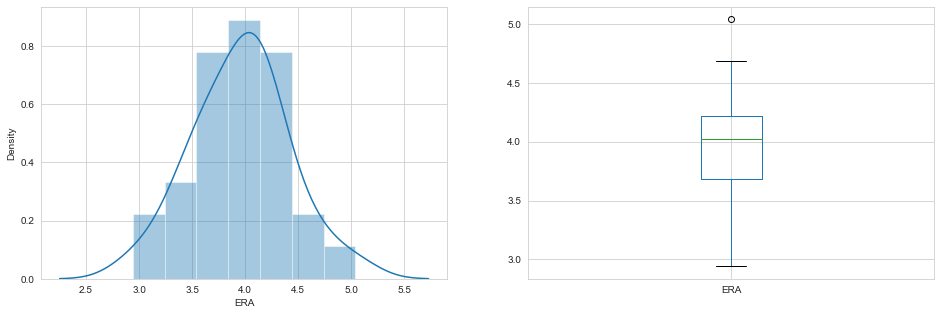

<Figure size 1152x360 with 0 Axes>

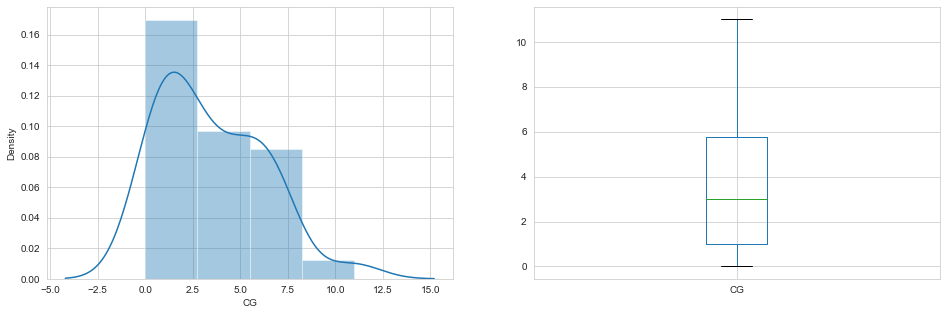

<Figure size 1152x360 with 0 Axes>

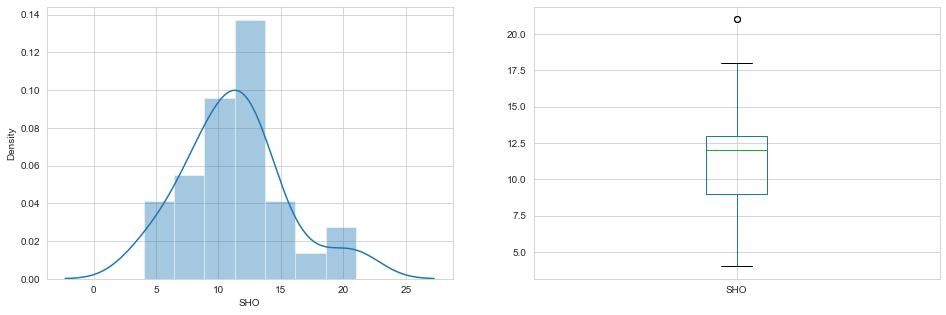

<Figure size 1152x360 with 0 Axes>

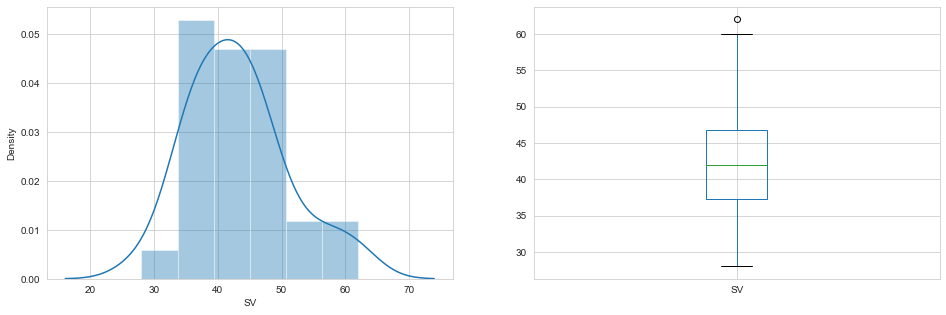

<Figure size 1152x360 with 0 Axes>

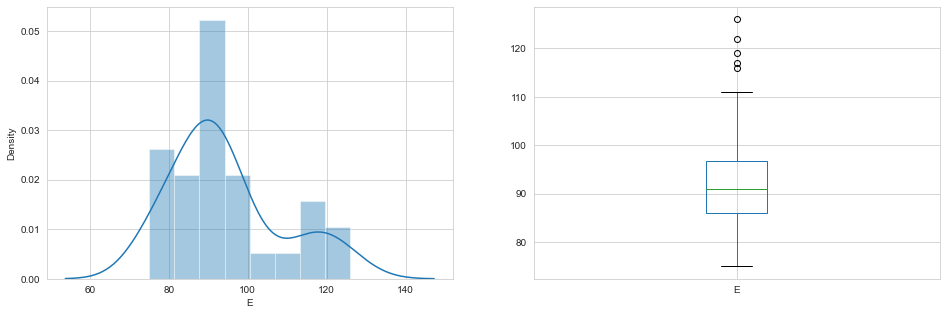

<Figure size 1152x360 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
collist=Baseball.columns.values
for i in range(0,len(collist)):
    plt.subplot(121)
    sns.distplot(Baseball[collist[i]])
    plt.subplot(122)
    Baseball[collist[i]].plot.box(figsize=(16,5))
    sns.set_style("whitegrid")
    plt.figure(figsize = (16,5))
    plt.show()

Here we can see almost all the data is Normalized and there is no much outliers present in the dataset

## Bivariate Analysis

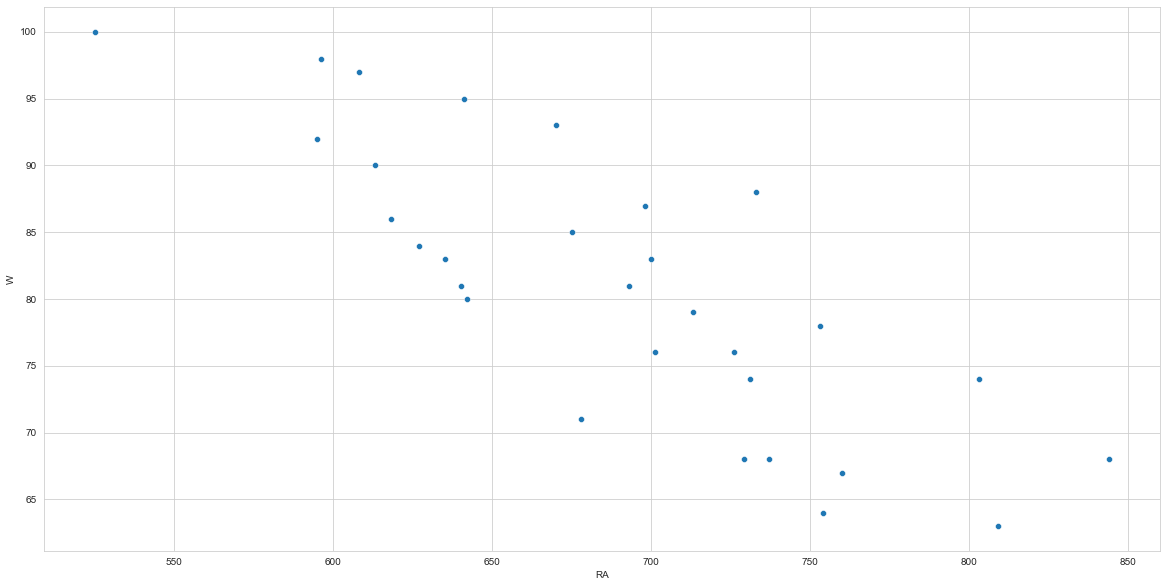

In [7]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'RA', y = 'W', data = Baseball)

When Runs Allowed increases the number of wins decreases.

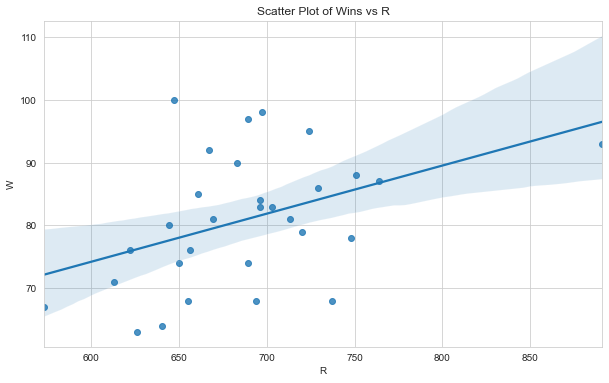

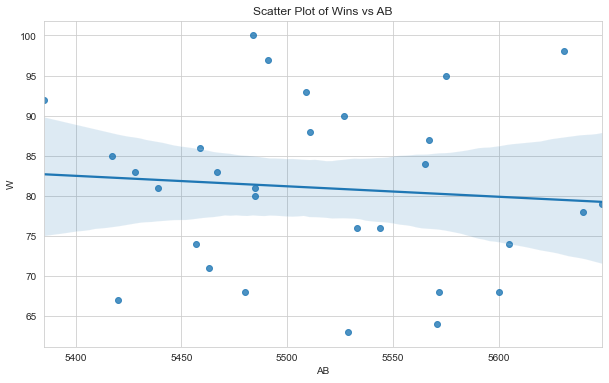

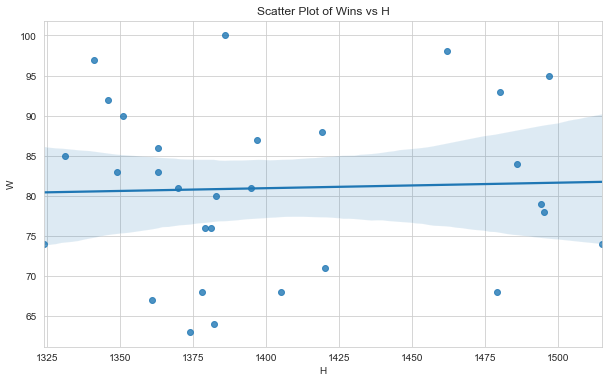

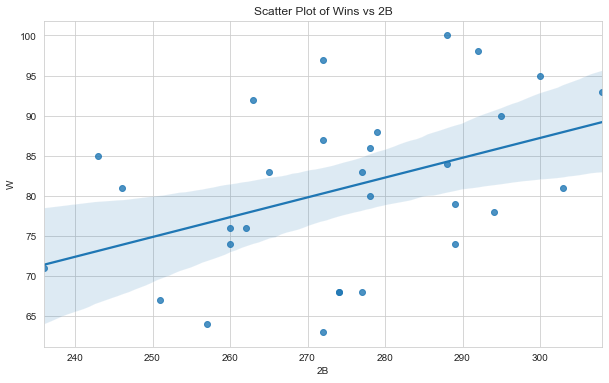

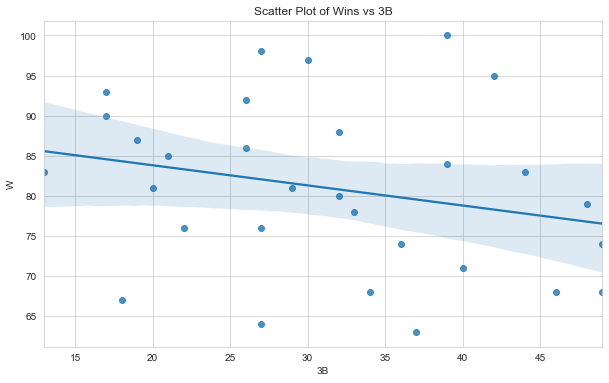

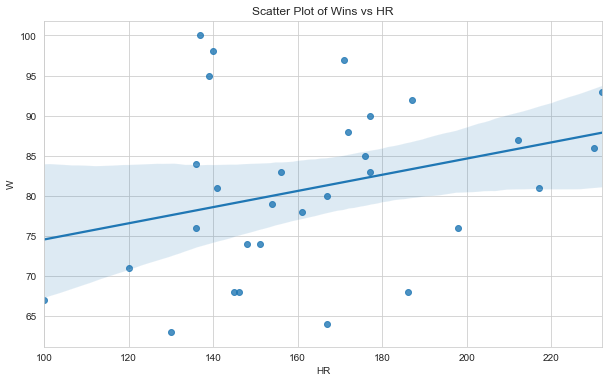

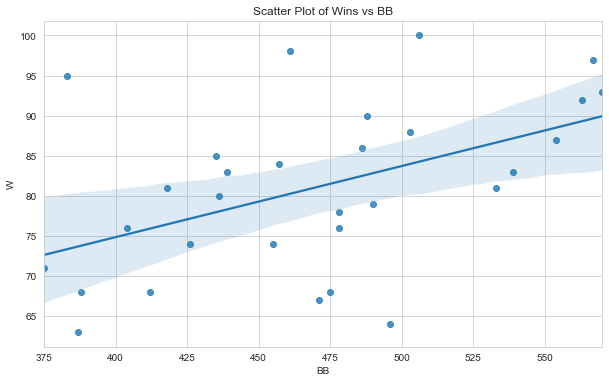

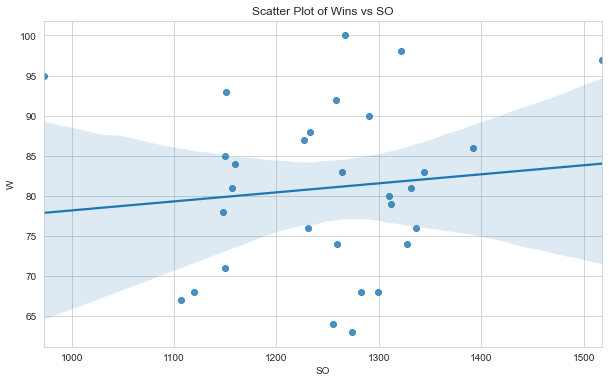

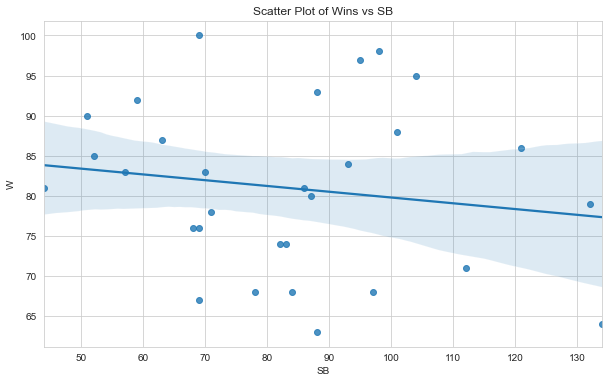

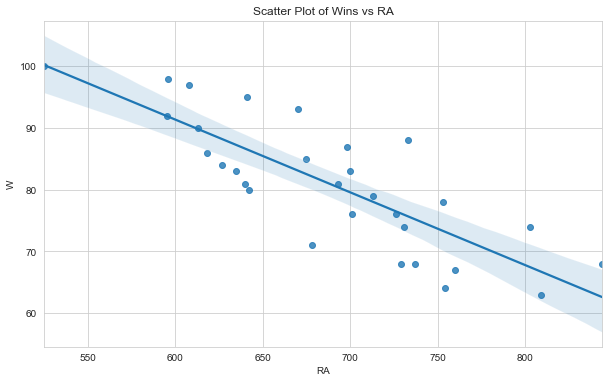

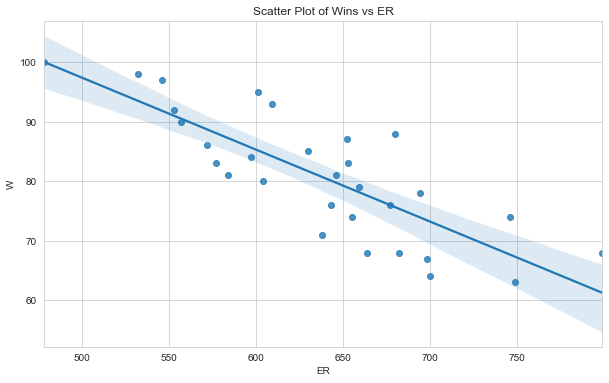

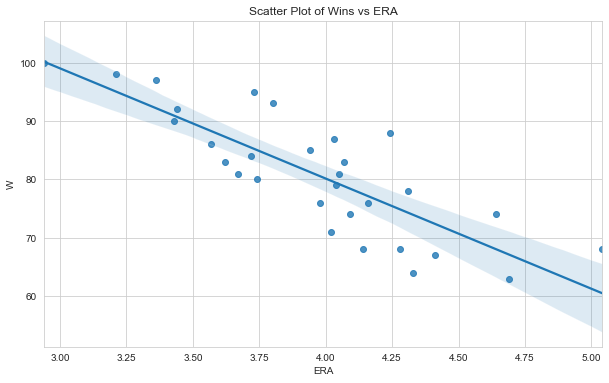

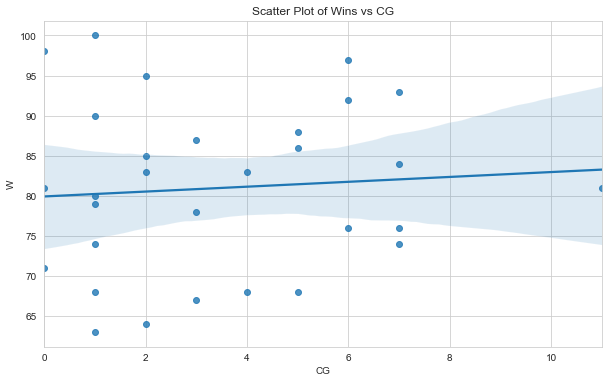

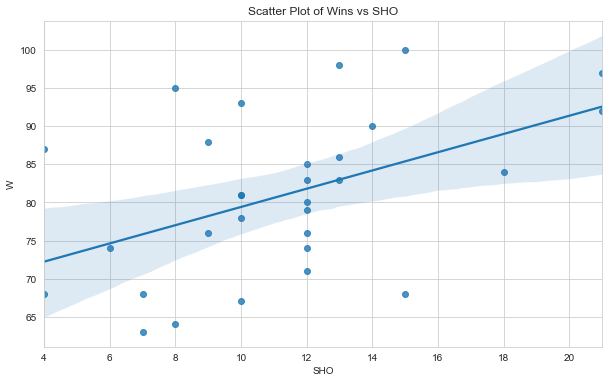

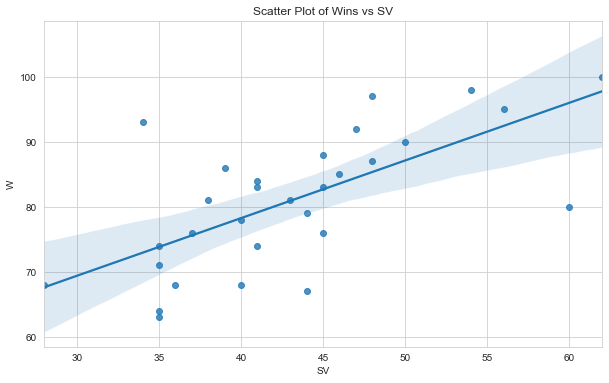

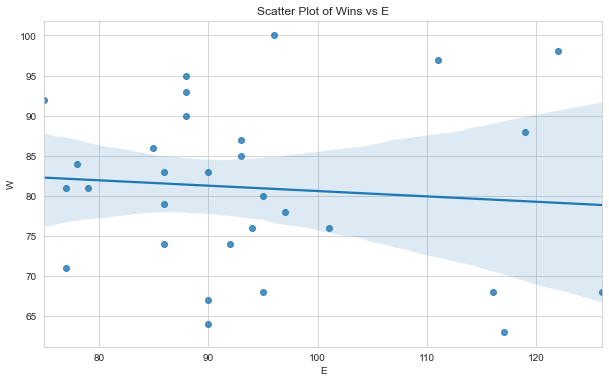

In [8]:
collist=Baseball.columns.values
for i in range(1,len(collist)):
    plt.figure(figsize = (10,6))
    sns.regplot(Baseball[collist[i]], Baseball['W'])
    plt.title('Scatter Plot of Wins vs %s' %(collist[i]))
    plt.xlabel(collist[i])
    plt.ylabel('W')
    plt.show()

RA, ER, ERA have good relation with Win.

Rest all the Columns does not good Relation with Win because data is scatter across all the places.

# Multi-Variate Analysis

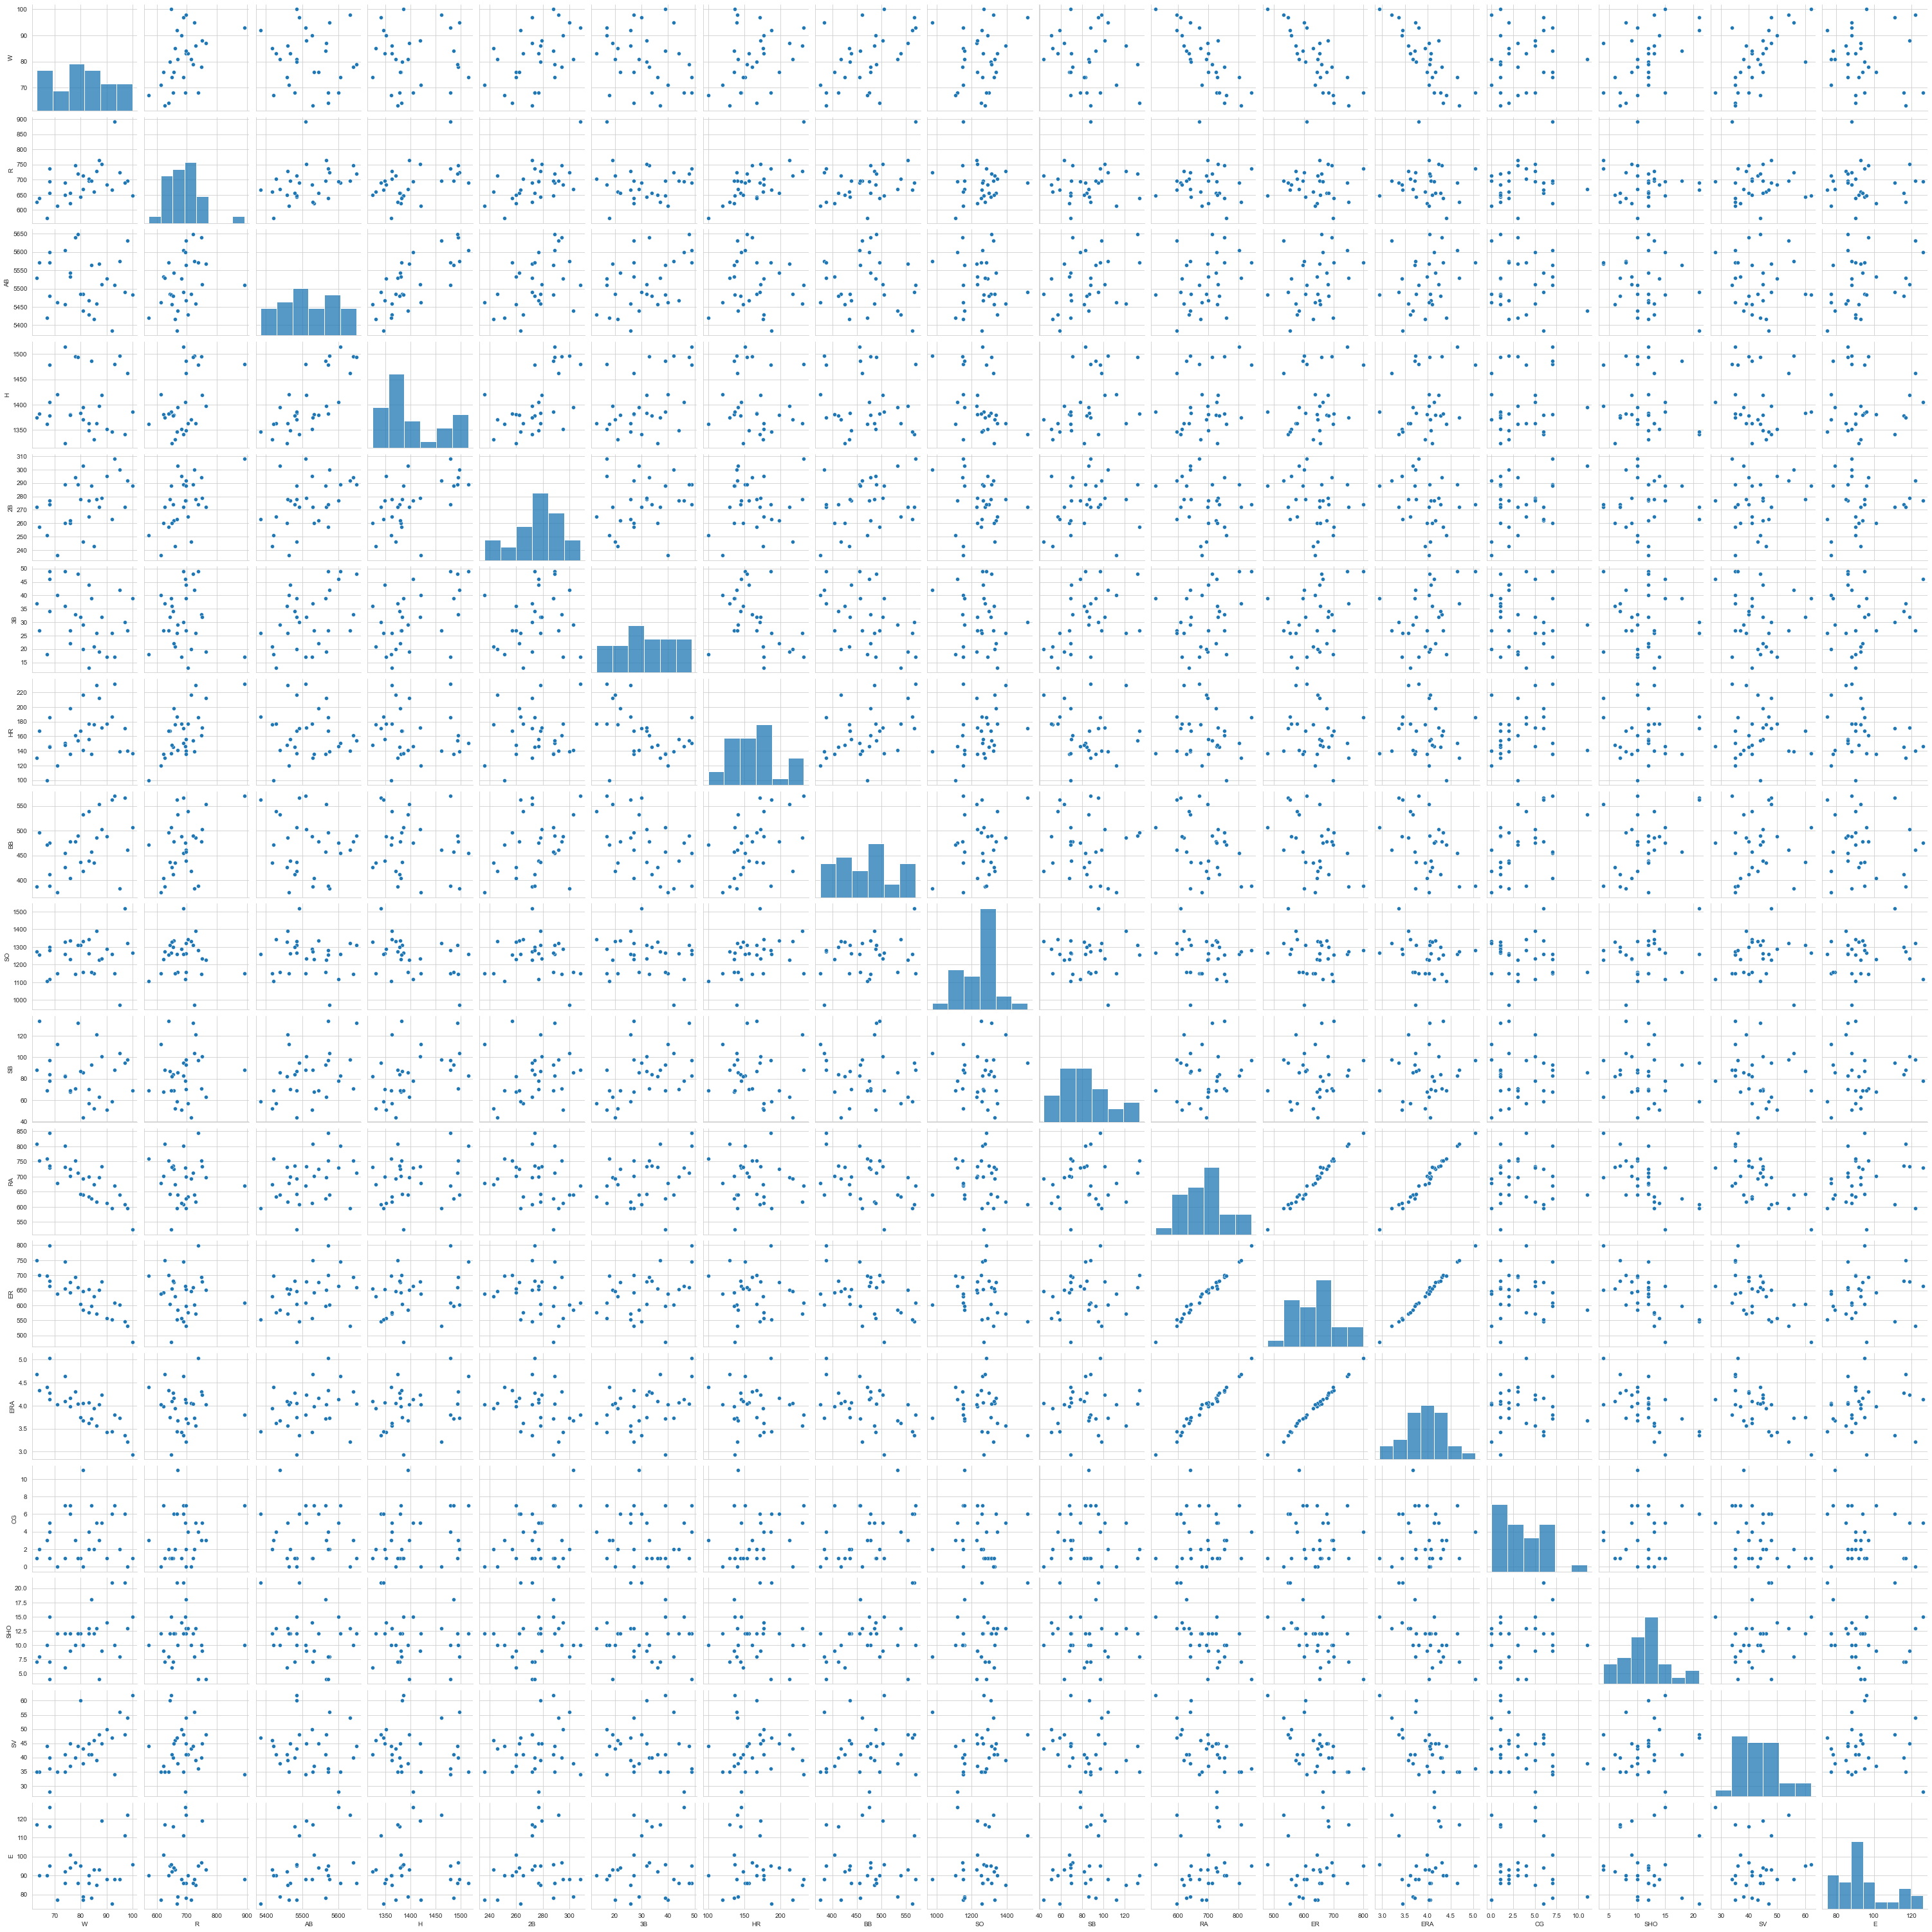

In [9]:
#Drawing Pairplot
sns.pairplot(Baseball)

Can not Judge anything becuase plot is too small, we will draw Heatmap for better understanding.

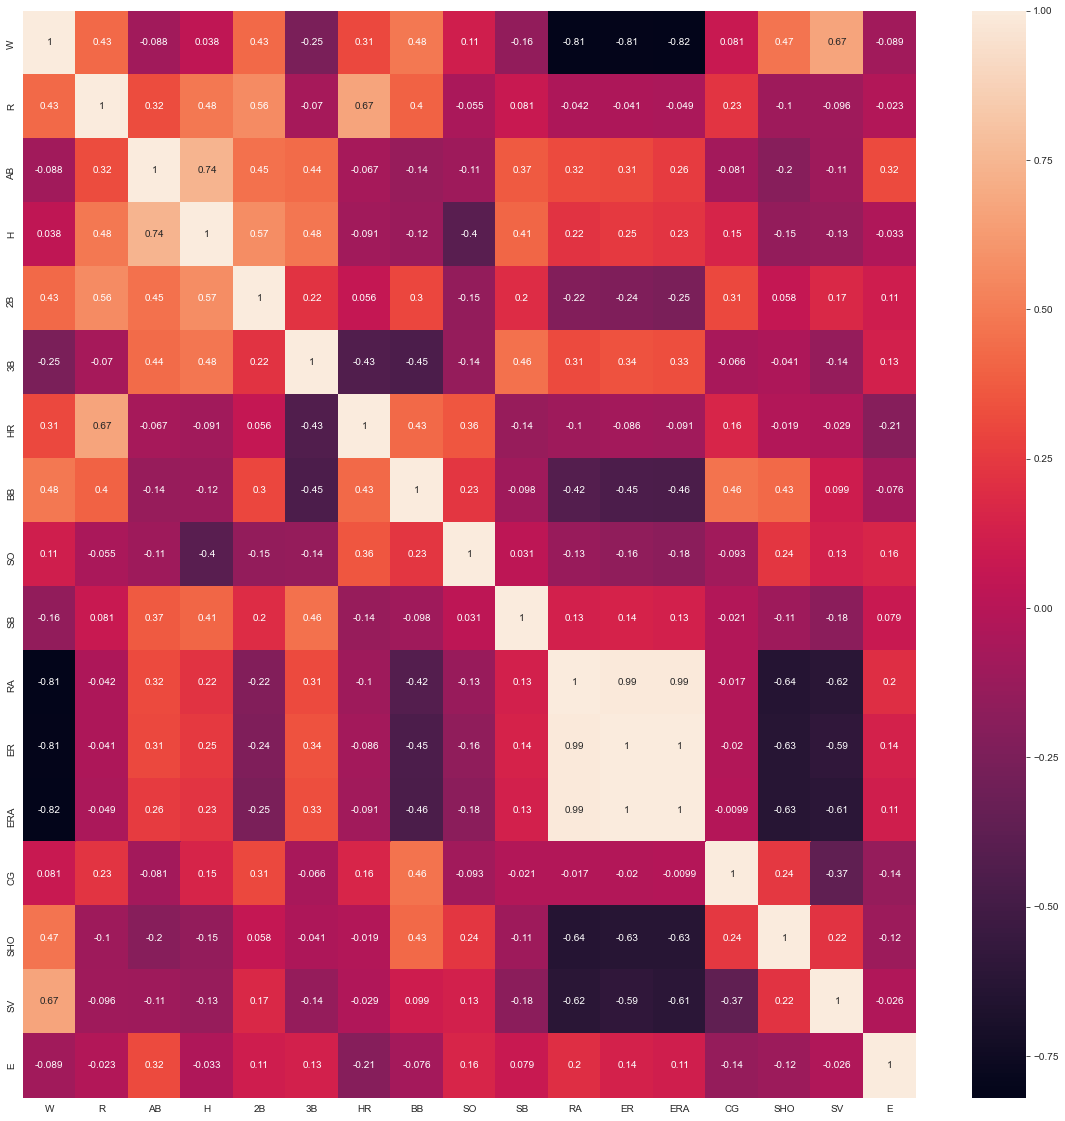

In [10]:
plt.figure(figsize = (20,20))
sns.heatmap(Baseball.corr(),annot=True)

There is a good and high Negative corelation between Win and RA,ER,ERA.

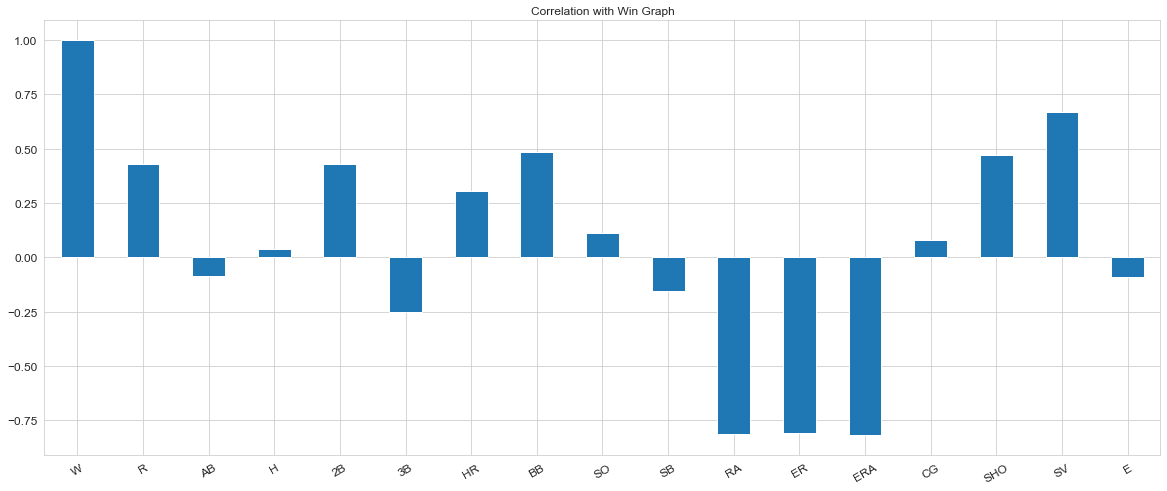

In [11]:
#Correlation with Win with respect to attributes
Baseball.corrwith(Baseball.W).plot.bar(
        figsize = (20, 8), title = "Correlation with Win Graph", fontsize = 12,
        rot = 30, grid = True)

We can see few positive Corealtion i.e. SHO,SV,R,2B and BB.

# Removing Outliers and Skewness

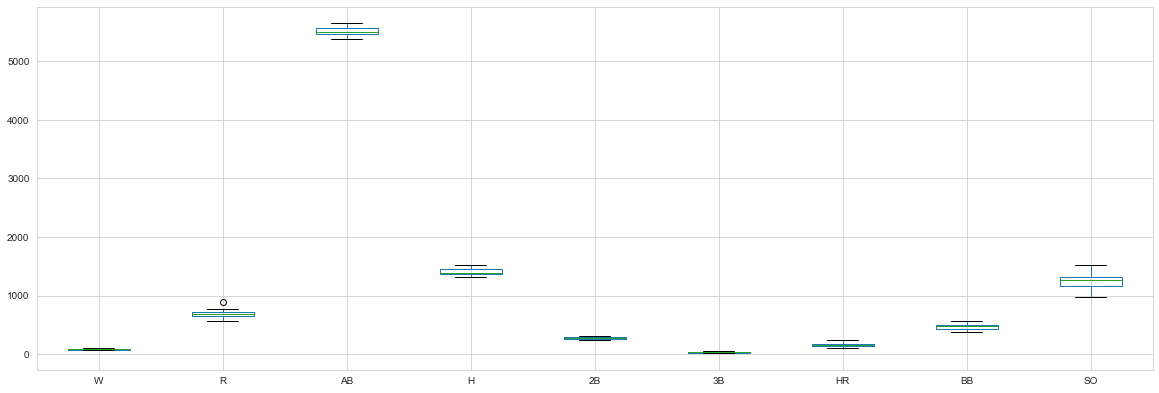

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
Baseball.iloc[:,:9].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

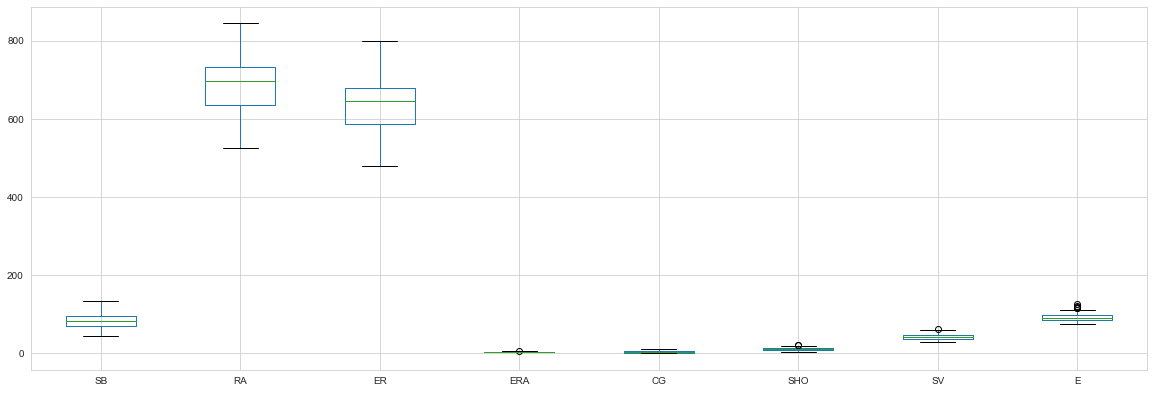

In [13]:
Baseball.iloc[:,9:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [14]:
Baseball.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Too much skewness is present in data.

R,H,CG,SV and E have too much skewness.

In [15]:
#shuffling the dataset
#This will Shuffle our dataset and it will avoid biasness of prediction
Baseball = Baseball.sample(frac=1, random_state = 0)

In [16]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(Baseball))
print(np.where(z>3))

(array([10], dtype=int64), array([1], dtype=int64))


Only 1 outlier is present is data

In [17]:
#Removing the outliers
import scipy
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(Baseball))
threshold=3
new_Baseball=Baseball[(z<3).all(axis=1)]
print(Baseball.shape)
print(new_Baseball.shape)

(30, 17)
(29, 17)


In [18]:
#checking for how much data we lost
loss_percent=(30-29)/30*100
print(loss_percent)

3.3333333333333335


We lost 3.3% data which is not bad.

In [19]:
Baseball.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [20]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
for i in new_Baseball.columns:
    if abs(new_Baseball.loc[:,i].skew())>0.55:
        new_Baseball[i]=np.cbrt(new_Baseball[i])

In [21]:
new_Baseball.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.753696
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -1.013981
SHO    0.526943
SV     0.280963
E      0.671748
dtype: float64

Skwenss is still present in data. We'll try to remove skweness again

In [22]:
#Using Power Transform to reduce Skwenwss
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in new_Baseball.columns:
    if abs(new_Baseball.loc[:,i].skew())>0.55:
        new_Baseball.loc[:,i]=PT.fit_transform(new_Baseball.loc[:,i].values.reshape(-1,1))

In [23]:
new_Baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
2,81,669,5439,0.0,303,29,141,533,1157,86,640,584,3.67,2.105225,10,3.361975,-1.325877
28,74,650,5457,0.0,260,36,148,426,1327,82,731,655,4.09,-0.739098,6,3.448217,0.001442
13,76,656,5544,0.0,262,22,198,478,1336,69,726,677,4.16,0.979584,12,3.556893,0.161036
10,88,751,5511,0.0,279,32,172,503,1233,101,733,680,4.24,0.713566,9,3.556893,1.554895
26,84,696,5565,0.0,288,39,136,457,1159,93,627,597,3.72,1.228118,18,3.448217,-1.454275


# Seperating Input and Output Variables

In [24]:
x=new_Baseball.iloc[:,1:]
y=new_Baseball.iloc[:,:1]

In [25]:
x.shape

(29, 16)

In [26]:
y.shape

(29, 1)

In [27]:
import numpy as np
y=np.ravel(y)
y.shape

(29,)

In [28]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
2,669,5439,0.0,303,29,141,533,1157,86,640,584,3.67,2.105225,10,3.361975,-1.325877
28,650,5457,0.0,260,36,148,426,1327,82,731,655,4.09,-0.739098,6,3.448217,0.001442
13,656,5544,0.0,262,22,198,478,1336,69,726,677,4.16,0.979584,12,3.556893,0.161036
10,751,5511,0.0,279,32,172,503,1233,101,733,680,4.24,0.713566,9,3.556893,1.554895
26,696,5565,0.0,288,39,136,457,1159,93,627,597,3.72,1.228118,18,3.448217,-1.454275


# Scaling

In [29]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#scaler=StandardScaler()
scaler=MinMaxScaler()
scale_x=scaler.fit_transform(x)
scale_x

array([[0.5026178 , 0.20454545, 0.        , 1.        , 0.44444444,
        0.31538462, 0.82291667, 0.33761468, 0.46666667, 0.36050157,
        0.33021807, 0.34761905, 1.        , 0.35294118, 0.35318084,
        0.14747804],
       [0.40314136, 0.27272727, 0.        , 0.35820896, 0.63888889,
        0.36923077, 0.265625  , 0.64954128, 0.42222222, 0.64576803,
        0.55140187, 0.54761905, 0.29447658, 0.11764706, 0.44678942,
        0.50821395],
       [0.43455497, 0.60227273, 0.        , 0.3880597 , 0.25      ,
        0.75384615, 0.53645833, 0.66605505, 0.27777778, 0.63009404,
        0.61993769, 0.58095238, 0.72078899, 0.47058824, 0.56474855,
        0.55158794],
       [0.93193717, 0.47727273, 0.        , 0.64179104, 0.52777778,
        0.55384615, 0.66666667, 0.47706422, 0.63333333, 0.65203762,
        0.62928349, 0.61904762, 0.65480432, 0.29411765, 0.56474855,
        0.93040798],
       [0.64397906, 0.68181818, 0.        , 0.7761194 , 0.72222222,
        0.27692308, 0.42708333, 

In [30]:
#Setting up the coulumns after Scaling
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x

In [31]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
2,0.502618,0.204545,0.0,1.000000,0.444444,0.315385,0.822917,0.337615,0.466667,0.360502,0.330218,0.347619,1.000000,0.352941,0.353181,0.147478
28,0.403141,0.272727,0.0,0.358209,0.638889,0.369231,0.265625,0.649541,0.422222,0.645768,0.551402,0.547619,0.294477,0.117647,0.446789,0.508214
13,0.434555,0.602273,0.0,0.388060,0.250000,0.753846,0.536458,0.666055,0.277778,0.630094,0.619938,0.580952,0.720789,0.470588,0.564749,0.551588
10,0.931937,0.477273,0.0,0.641791,0.527778,0.553846,0.666667,0.477064,0.633333,0.652038,0.629283,0.619048,0.654804,0.294118,0.564749,0.930408
26,0.643979,0.681818,0.0,0.776119,0.722222,0.276923,0.427083,0.341284,0.544444,0.319749,0.370717,0.371429,0.782437,0.823529,0.446789,0.112582


# Finding Best Random State

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.8837646208981397  on Random_state  108


# Train Test Split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Finding Best Algorithm

In [34]:
#importing all the required libraries to find best Algorithm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]

In [35]:
for m in model:
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print("cross validation score:  ", abs(score.mean()))
    print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,pred)-abs(score.mean()))
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LinearRegression()
R2 Score:                 0.8837646208981397
Mean Absolute Error:      3.6228127521055944
Mean Squared error:       16.453763663974453
Root Mean Squared Error:  4.056323910140122
[0.56607086 0.70976274 0.13828766 0.7593263  0.12300991]
cross validation score:   0.45929149343681014
Difference between R2 score and cross validatio score is -  0.42447312746132954
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.8075530612244899
Mean Absolute Error:      4.

# Hyper Parameter Tuning

In [36]:
#import the randomized search CV
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' :[2,3,4,5,6,7],'random_state':[2,3,4,5,6,7], 'solver' : [ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Rd=Ridge()

clf = GridSearchCV(Ridge(), parameters, cv=8)
clf.fit(x_train, y_train)
clf.best_params_  #Best parameters

{'max_iter': 3, 'random_state': 3, 'solver': 'sag'}

In [37]:
clf_pred=clf.best_estimator_.predict(x_test)

In [38]:
r2_score(y_test, clf_pred)

0.8154238646124279

# Saving the model

In [39]:
import joblib
joblib.dump(clf.best_estimator_,"PJ1_Baseball.obj")
RF_from_joblib=joblib.load('PJ1_Baseball.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([89.16743995, 80.74538918, 64.67753929, 70.68863907, 72.83761006,
       80.29111681, 67.60466975, 84.22170226, 86.90994154])

In [40]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8
Predicted,89.16744,80.745389,64.677539,70.688639,72.83761,80.291117,67.60467,84.221702,86.909942
Original,98.00000,83.000000,63.000000,67.000000,76.00000,85.000000,68.00000,83.000000,97.000000


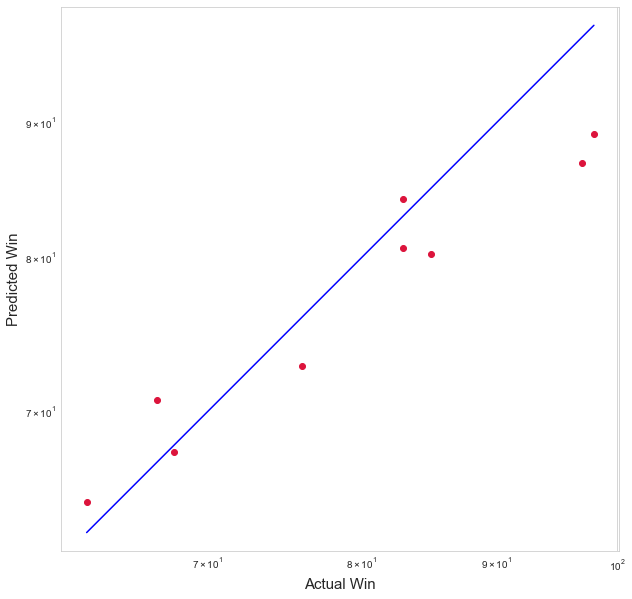

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y_test))
p2 = min(min(Predicted), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Win', fontsize=15)
plt.ylabel('Predicted Win', fontsize=15)
plt.axis('equal')
plt.show()